In [1]:
import tensorflow.compat.v1 as tf
tf.disable_eager_execution()

In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# Training Data.
train_X = np.array([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
              7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = np.array([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
              2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = X.shape[0]

In [9]:
learning_rate = 0.01
epochs = 1000
display_step = 50

在这个例子中，我们把 Optimizer 也添加进来。

Epoch:  50 	 cost =  0.0790628 	 W= 0.22544505 	 b =  0.9844758
Epoch:  100 	 cost =  0.078818746 	 W= 0.22698817 	 b =  0.9735358
Epoch:  150 	 cost =  0.078602605 	 W= 0.22844036 	 b =  0.9632403
Epoch:  200 	 cost =  0.07841117 	 W= 0.22980699 	 b =  0.9535516
Epoch:  250 	 cost =  0.078241654 	 W= 0.23109312 	 b =  0.9444335
Epoch:  300 	 cost =  0.07809151 	 W= 0.23230349 	 b =  0.9358525
Epoch:  350 	 cost =  0.07795852 	 W= 0.23344252 	 b =  0.9277773
Epoch:  400 	 cost =  0.07784075 	 W= 0.23451445 	 b =  0.9201778
Epoch:  450 	 cost =  0.07773646 	 W= 0.23552321 	 b =  0.91302615
Epoch:  500 	 cost =  0.077644095 	 W= 0.23647252 	 b =  0.9062959
Epoch:  550 	 cost =  0.077562295 	 W= 0.23736592 	 b =  0.8999622
Epoch:  600 	 cost =  0.07748984 	 W= 0.23820665 	 b =  0.89400166
Epoch:  650 	 cost =  0.07742568 	 W= 0.23899788 	 b =  0.88839227
Epoch:  700 	 cost =  0.07736885 	 W= 0.23974246 	 b =  0.88311356
Epoch:  750 	 cost =  0.07731853 	 W= 0.24044326 	 b =  0.8781451
Epo

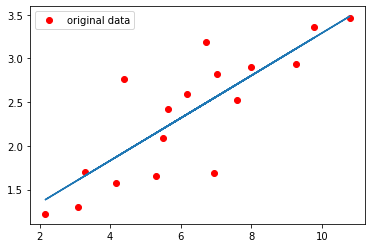

In [24]:
g1 = tf.Graph()
with g1.as_default():
    x = tf.placeholder(tf.float32)
    y = tf.placeholder(tf.float32)
    
    w = tf.Variable(np.random.randn(), name="weights")
    b = tf.Variable(np.random.randn(), name="bias")
    
    pred = tf.add(tf.multiply(w, x), b)
    
    # reduce_sum 会将传入的数据逐项调用 tf.pow 计算
    cost = tf.reduce_sum(tf.pow(pred - y, 2)) / (2 * n_samples)
    
    # 加入 optimizer 节点
    optimizer = tf.train.GradientDescentOptimizer(
        learning_rate).minimize(cost)
    
    # Initializer the variables
    init = tf.global_variables_initializer()
    
    with tf.Session() as sess:
        writer = tf.summary.FileWriter("./logs/lr",
                                       sess.graph)
        sess.run(init)
        
        # Fit all training data
        for epoch in range(epochs):
            sess.run(optimizer, feed_dict={x:train_X, 
                                           y:train_Y})
            
            if (epoch + 1) % display_step == 0:
                c = sess.run(cost, feed_dict={x:train_X,
                                         y:train_Y})
                print("Epoch: ", epoch + 1, "\t cost = ", c,
                 "\t W=", sess.run(w), "\t b = ", sess.run(b))

        print("Optimizer Finished!\n")
        train_cost = sess.run(cost, feed_dict={x:train_X,
                             y:train_Y})
        print("Train_cost:", train_cost, "\t w=", sess.run(w), "\t b = ", sess.run(b))
        
        plt.plot(train_X, train_Y, 'ro', label="original data")
        plt.plot(train_X, sess.run(w) * train_X + sess.run(b))
        plt.legend()
        plt.show()
        

查看一下我们的模型计算图。

<img src="./lr.png" >